<a href="https://colab.research.google.com/github/Rosangelafl/perfil-politico/blob/main/candidatos2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv

In [ ]:
dados = '/content/drive/My Drive/eleicoes2020_dados_tse/eleições2020/consulta_cand_2020/consulta_cand_2020_BRASIL.csv'

In [ ]:
arquivo = open(dados, encoding='latin-1')
leitor = csv.reader(arquivo)
print(next(leitor))

['DT_GERACAO;"HH_GERACAO";"ANO_ELEICAO";"CD_TIPO_ELEICAO";"NM_TIPO_ELEICAO";"NR_TURNO";"CD_ELEICAO";"DS_ELEICAO";"DT_ELEICAO";"TP_ABRANGENCIA";"SG_UF";"SG_UE";"NM_UE";"CD_CARGO";"DS_CARGO";"SQ_CANDIDATO";"NR_CANDIDATO";"NM_CANDIDATO";"NM_URNA_CANDIDATO";"NM_SOCIAL_CANDIDATO";"NR_CPF_CANDIDATO";"NM_EMAIL";"CD_SITUACAO_CANDIDATURA";"DS_SITUACAO_CANDIDATURA";"CD_DETALHE_SITUACAO_CAND";"DS_DETALHE_SITUACAO_CAND";"TP_AGREMIACAO";"NR_PARTIDO";"SG_PARTIDO";"NM_PARTIDO";"SQ_COLIGACAO";"NM_COLIGACAO";"DS_COMPOSICAO_COLIGACAO";"CD_NACIONALIDADE";"DS_NACIONALIDADE";"SG_UF_NASCIMENTO";"CD_MUNICIPIO_NASCIMENTO";"NM_MUNICIPIO_NASCIMENTO";"DT_NASCIMENTO";"NR_IDADE_DATA_POSSE";"NR_TITULO_ELEITORAL_CANDIDATO";"CD_GENERO";"DS_GENERO";"CD_GRAU_INSTRUCAO";"DS_GRAU_INSTRUCAO";"CD_ESTADO_CIVIL";"DS_ESTADO_CIVIL";"CD_COR_RACA";"DS_COR_RACA";"CD_OCUPACAO";"DS_OCUPACAO";"VR_DESPESA_MAX_CAMPANHA";"CD_SIT_TOT_TURNO";"DS_SIT_TOT_TURNO";"ST_REELEICAO";"ST_DECLARAR_BENS";"NR_PROTOCOLO_CANDIDATURA";"NR_PROCESSO";"CD

In [ ]:
import os
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs
style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,9)

In [ ]:
dados = '/content/drive/My Drive/eleicoes2020_dados_tse/eleições2020/consulta_cand_2020/consulta_cand_2020_BRASIL.csv'
df = pd.read_csv(dados, encoding='latin-1', index_col=None, low_memory=False, error_bad_lines=False, sep=';', quotechar='"')

In [ ]:
df.head(2).T

,0,1
DT_GERACAO,17/10/2020,17/10/2020
HH_GERACAO,17:08:45,17:08:45
ANO_ELEICAO,2020,2020
CD_TIPO_ELEICAO,2,2
NM_TIPO_ELEICAO,ELEIÇÃO ORDINÁRIA,ELEIÇÃO ORDINÁRIA
...,...,...
CD_SITUACAO_CANDIDATO_PLEITO,-1,-1
DS_SITUACAO_CANDIDATO_PLEITO,#NULO#,#NULO#
CD_SITUACAO_CANDIDATO_URNA,-1,-1
DS_SITUACAO_CANDIDATO_URNA,#NULO#,#NULO#


In [ ]:
df.index

RangeIndex(start=0, stop=554909, step=1)

In [ ]:
df = df = pd.read_csv(dados, encoding='latin-1', index_col=None, low_memory=False, error_bad_lines=False, sep=';', 
                      parse_dates=['DT_NASCIMENTO'], quotechar='"', 
                      usecols=['SG_UE','NM_UE','DS_CARGO','SQ_CANDIDATO','NM_CANDIDATO','NM_URNA_CANDIDATO',
                                         'NM_SOCIAL_CANDIDATO','TP_AGREMIACAO','SG_PARTIDO','NM_PARTIDO',
                                         'DS_COMPOSICAO_COLIGACAO','DS_NACIONALIDADE','SG_UF_NASCIMENTO',
                                         'DT_NASCIMENTO','NR_IDADE_DATA_POSSE','DS_GENERO','DS_GRAU_INSTRUCAO',
                                         'DS_ESTADO_CIVIL','DS_COR_RACA','DS_OCUPACAO','VR_DESPESA_MAX_CAMPANHA',
                                         'ST_REELEICAO','ST_DECLARAR_BENS'])
df.head(3).T

,0,1,2
SG_UE,57150,90247,80861
NM_UE,PEDRO CANÁRIO,SÃO JOSÉ DO XINGU,IRATI
DS_CARGO,VEREADOR,VEREADOR,VEREADOR
SQ_CANDIDATO,80001107438,110000678054,240000678029
NM_CANDIDATO,RIMARCK SILVA TEIXEIRA,MARCOS ROGERIO PEREIRA NUNES,ZENILDE TEDESCO
NM_URNA_CANDIDATO,RIMARCK TEIXEIRA,BUGÃO,ZENILDE TEDESCO
NM_SOCIAL_CANDIDATO,#NULO#,#NULO#,#NULO#
TP_AGREMIACAO,PARTIDO ISOLADO,PARTIDO ISOLADO,PARTIDO ISOLADO
SG_PARTIDO,PV,PSB,MDB
NM_PARTIDO,PARTIDO VERDE,PARTIDO SOCIALISTA BRASILEIRO,MOVIMENTO DEMOCRÁTICO BRASILEIRO


In [ ]:
df.columns = ['CODIGO_TSE' if x=='SG_UE' else x for x in df.columns] 

In [ ]:
df.isnull().sum()

CODIGO_TSE                 0
NM_UE                      0
DS_CARGO                   0
SQ_CANDIDATO               0
NM_CANDIDATO               0
NM_URNA_CANDIDATO          3
NM_SOCIAL_CANDIDATO        0
TP_AGREMIACAO              0
SG_PARTIDO                 0
NM_PARTIDO                 0
DS_COMPOSICAO_COLIGACAO    0
DS_NACIONALIDADE           0
SG_UF_NASCIMENTO           0
DT_NASCIMENTO              0
NR_IDADE_DATA_POSSE        0
DS_GENERO                  0
DS_GRAU_INSTRUCAO          0
DS_ESTADO_CIVIL            0
DS_COR_RACA                0
DS_OCUPACAO                0
VR_DESPESA_MAX_CAMPANHA    0
ST_REELEICAO               0
ST_DECLARAR_BENS           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554909 entries, 0 to 554908
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   CODIGO_TSE               554909 non-null  int64         
 1   NM_UE                    554909 non-null  object        
 2   DS_CARGO                 554909 non-null  object        
 3   SQ_CANDIDATO             554909 non-null  int64         
 4   NM_CANDIDATO             554909 non-null  object        
 5   NM_URNA_CANDIDATO        554906 non-null  object        
 6   NM_SOCIAL_CANDIDATO      554909 non-null  object        
 7   TP_AGREMIACAO            554909 non-null  object        
 8   SG_PARTIDO               554909 non-null  object        
 9   NM_PARTIDO               554909 non-null  object        
 10  DS_COMPOSICAO_COLIGACAO  554909 non-null  object        
 11  DS_NACIONALIDADE         554909 non-null  object        
 12  SG_UF_NASCIMENTO

In [ ]:
df.SQ_CANDIDATO = df.SQ_CANDIDATO.astype('category')

In [ ]:
df.CODIGO_TSE = df.CODIGO_TSE.astype('category')

In [ ]:
df[df['NM_CANDIDATO'] == 'JOÃO CARLOS RIBEIRO']

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
96212,80870,CORUPÁ,VEREADOR,240001133331,JOÃO CARLOS RIBEIRO,JOÃO CONTADOR,#NULO#,PARTIDO ISOLADO,PSD,PARTIDO SOCIAL DEMOCRÁTICO,PSD,BRASILEIRA NATA,SC,1970-10-26,50,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,CONTADOR,12308,N,S
262007,70092,SALTO GRANDE,PREFEITO,250000751001,JOÃO CARLOS RIBEIRO,CARLINHOS,#NULO#,COLIGAÇÃO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSB / PSDB / MDB,BRASILEIRA NATA,SP,1971-08-14,49,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,123077,N,S
300190,75043,PINHAIS,VEREADOR,160000846789,JOÃO CARLOS RIBEIRO,RADIALISTA JOÃOZINHO RIBEIRO,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,PR,1976-07-13,44,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,OUTROS,119413,N,N
448405,75523,PONTAL DO PARANÁ,PREFEITO,160001000870,JOÃO CARLOS RIBEIRO,JOAO,#NULO#,COLIGAÇÃO,PSC,PARTIDO SOCIAL CRISTÃO,PV / PSC / REPUBLICANOS / PP / PSB / PROS / PODE,BRASILEIRA NATA,PR,1941-05-05,79,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,213480,N,S
496477,19810,CAMPINA GRANDE,VEREADOR,150000639294,JOÃO CARLOS RIBEIRO,JOÃO DOS FOGOS,#NULO#,PARTIDO ISOLADO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS,BRASILEIRA NATA,PB,1967-01-17,53,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),BRANCA,COMERCIANTE,164341,N,S


In [ ]:
#filtrando pelo SQ_CANDIDATO, o candidato mais rico do Brasil

df[df['SQ_CANDIDATO'] ==  160001000870]

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
448405,75523,PONTAL DO PARANÁ,PREFEITO,160001000870,JOÃO CARLOS RIBEIRO,JOAO,#NULO#,COLIGAÇÃO,PSC,PARTIDO SOCIAL CRISTÃO,PV / PSC / REPUBLICANOS / PP / PSB / PROS / PODE,BRASILEIRA NATA,PR,1941-05-05,79,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,213480,N,S


In [ ]:
df['SQ_CANDIDATO'].nunique()

554909

In [ ]:
df['NM_UE'].nunique()

5295

In [ ]:
# O Brasil tem 5570 municípios. Em 275 cidades os dados do TSE não estavam preenchidos em 17/10/2020
5570 - 5295

275

In [ ]:
df.groupby(by='DS_GENERO').size()

DS_GENERO
FEMININO     185441
MASCULINO    369468
dtype: int64

In [ ]:
print('candidatas:', ((185441/554909) *100))
print('candidatos:', ((369468/554909) *100))


candidatas: 33.4182721851691
candidatos: 66.5817278148309


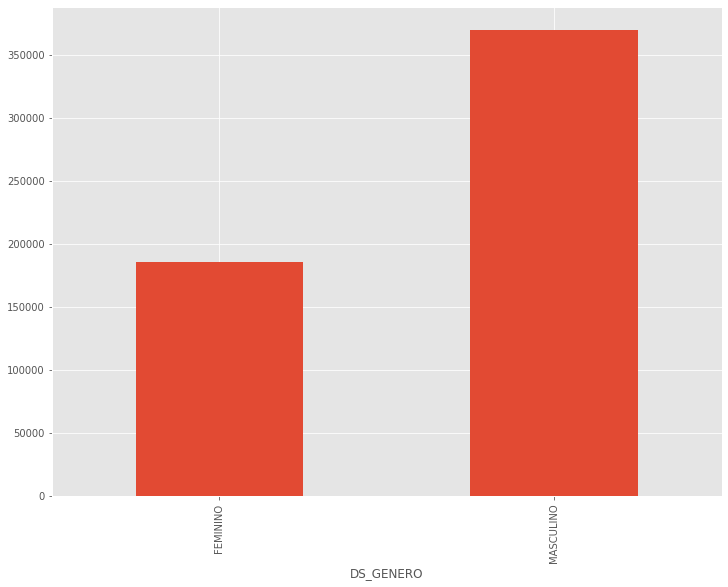

In [ ]:
genero = df.groupby(by='DS_GENERO').size()
genero.plot(kind ='bar')
plt.show()


In [ ]:
df.groupby(by='DS_COR_RACA').size()

DS_COR_RACA
AMARELA             1962
BRANCA            266731
INDÍGENA            2198
PARDA             218981
PRETA              58325
SEM INFORMAÇÃO      6712
dtype: int64

In [ ]:
raca = df.groupby(by='DS_COR_RACA').size()

In [ ]:
print('candidatos autodeclarados de origem asiatica:', ((1962/ 554909) *100))
print('candidatos autodeclarados brancos:', ((266731/ 554909) *100))
print('candidatos autodeclarados indigenas:', ((2198 / 554909) *100))
print('candidatos autodeclarados pardos:', ((218981/ 554909) *100))
print('candidatos autodeclarados pretos:', ((58325/554909) *100))
print('candidatos que não declararam raça/etnia:', ((6712/ 554909) *100))

candidatos autodeclarados de origem asiatica: 0.353571486495984
candidatos autodeclarados brancos: 48.06752098091759
candidatos autodeclarados indigenas: 0.3961009823232278
candidatos autodeclarados pardos: 39.46250646502399
candidatos autodeclarados pretos: 10.510732390355896
candidatos que não declararam raça/etnia: 1.2095676948833052


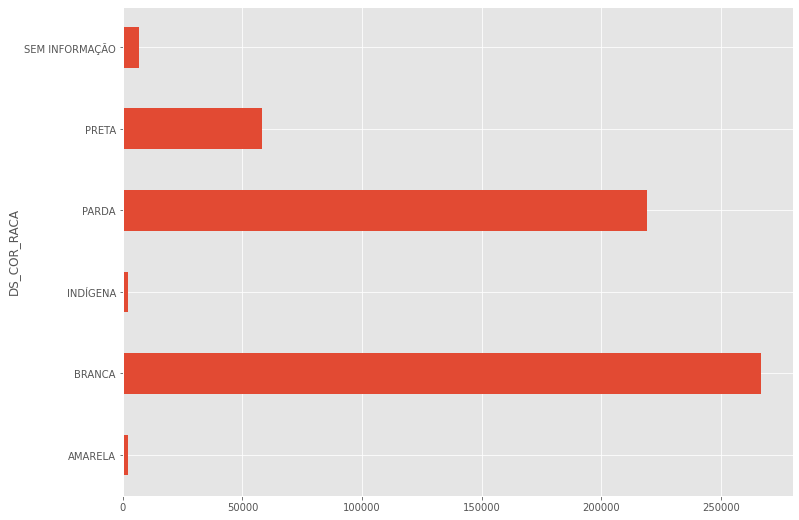

In [ ]:
raca.plot(kind='barh')
plt.show()

In [ ]:
df.query('DS_COR_RACA=="PRETA" & DS_GENERO=="MASCULINO"').count().head(1)

CODIGO_TSE    38374
dtype: int64

In [ ]:
df.query('DS_COR_RACA=="BRANCA" & DS_GENERO=="MASCULINO"').count().head(1)

CODIGO_TSE    174895
dtype: int64

In [ ]:
df.query('DS_COR_RACA=="PARDA" & DS_GENERO=="MASCULINO"').count().head(1)

CODIGO_TSE    149021
dtype: int64

In [ ]:
df.query('DS_COR_RACA=="BRANCA" & DS_GENERO=="FEMININO"').count().head(1)

CODIGO_TSE    91836
dtype: int64

In [ ]:
df.query('DS_COR_RACA=="PRETA" & DS_GENERO=="FEMININO"').count().head(1)

CODIGO_TSE    19951
dtype: int64

In [ ]:
df.query('DS_COR_RACA=="PARDA" & DS_GENERO=="FEMININO"').count().head(1)

CODIGO_TSE    69960
dtype: int64

In [ ]:
#Qual a porcentagem de homens e mulheres de diferentes etnias candidatos em 2020
print(f'Homens brancos representam :', ((174895/ 554909) *100))
print(f'Homens pretos representam :', ((38374/ 554909) *100))
print(f'Homens pardos representam :', ((149021/ 554909) *100))
print(f'Mulheres brancas representam :', ((91836/ 554909) *100))
print(f'Mulheres pretas representam:', ((19951/ 554909) *100))
print(f'Mulheres pardas representam:', ((69960/ 554909) *100))

Homens brancos representam : 31.517780392821166
Homens pretos representam : 6.915368105401065
Homens pardos representam : 26.855033888439365
Mulheres brancas representam : 16.549740588096427
Mulheres pretas representam: 3.595364284954831
Mulheres pardas representam: 12.60747257658463


In [ ]:
df['NR_IDADE_DATA_POSSE'].unique()

array([ 30,  34,  60,  41,  35,  47,  55,  57,  31,  49,  37,  32,  46,
        71,  42,  27,  54,  36,  52,  64,  43,  28,  44,  58,  39,  63,
        45,  48,  40,  53,  51,  80,  19,  65,  61,  38,  68,  24,  33,
        50,  56,  25,  59,  66,  67,  62,  70,  22,  29,  26,  75,  21,
        72,  73,  23,  87,  69,  20,  79,  76,  74,  78,  84,  82,  77,
        18,  85,  90,  81,  89,  83,  95,  86,  91, 101,  88,  93,  98,
       102, 116,  17,  16,  96, 113, 120,  92, 107,  99])

In [ ]:
df['NR_IDADE_DATA_POSSE'].mean()

45.58629613143777

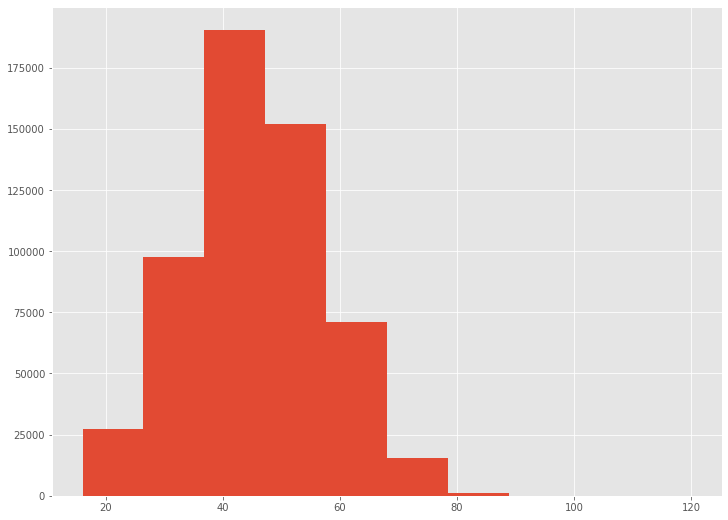

In [ ]:
df['NR_IDADE_DATA_POSSE'].hist()

In [ ]:
df[df['NR_IDADE_DATA_POSSE'] == 120]

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
354753,35890,IRAQUARA,VEREADOR,50001213318,ELIZENIA SOUZA OLIVEIRA,RUM,#NULO#,PARTIDO ISOLADO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PSB,BRASILEIRA NATA,BA,1900-11-10,120,FEMININO,LÊ E ESCREVE,SOLTEIRO(A),PARDA,AGRICULTOR,12308,N,S


In [ ]:
df[df['NR_IDADE_DATA_POSSE'] == 17]

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
164074,2658,NOVA OLINDA DO NORTE,VEREADOR,40000890686,FRANCINEIA OLIVEIRA DE SOUZA,FRAN SOUZA,#NULO#,PARTIDO ISOLADO,DC,DEMOCRACIA CRISTÃ,DC,BRASILEIRA NATA,AM,2003-02-24,17,FEMININO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),PARDA,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS",15999,N,S
199181,5231,SALINÓPOLIS,VEREADOR,140001009437,DEYSE ADRIELE DA SILVA SARMANHO,DEYSE SILVA,#NULO#,PARTIDO ISOLADO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS,BRASILEIRA NATA,PA,2003-06-30,17,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,34730,N,S


In [ ]:
df.groupby(by='DS_GENERO')['NR_IDADE_DATA_POSSE'].mean()

DS_GENERO
FEMININO     44.342670
MASCULINO    46.210489
Name: NR_IDADE_DATA_POSSE, dtype: float64

In [ ]:
df.groupby(by='DS_GENERO')['NR_IDADE_DATA_POSSE'].median()

DS_GENERO
FEMININO     44
MASCULINO    46
Name: NR_IDADE_DATA_POSSE, dtype: int64

In [ ]:
df['NM_SOCIAL_CANDIDATO'].value_counts()

#NULO#                                      554742
FILIPA BRUNELLI IANI                             1
ALANA DE CARVALHO                                1
VERÔNICA ALVES DOS SANTOS                        1
ESMERALDA PEREIRA                                1
                                             ...  
RANNEY MENDES SILVA                              1
ANNA CLAUDIA RODRIGUES DA SILVA DE SOUSA         1
LADY MACIEL                                      1
LEO KRET DO BRASIL                               1
BRUNA LA CLOSE                                   1
Name: NM_SOCIAL_CANDIDATO, Length: 168, dtype: int64

In [ ]:
df[df['NM_SOCIAL_CANDIDATO'] != '#NULO#']

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
5255,56219,BOM JESUS DO NORTE,VEREADOR,80001060127,JOYCE RODRIGUES DA SILVA,JOYCE RODRIGUES,JOYCE RODRIGUES DA SILVA,PARTIDO ISOLADO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,BRASILEIRA NATA,RJ,1981-02-20,39,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PRETA,CABELEIREIRO E BARBEIRO,12308,N,S
9967,95958,PLANALTINA,VEREADOR,90000774205,UANDERSON XAVIER COELHO,TIO ANDERSON MALLONY,BABY MALLONY,PARTIDO ISOLADO,CIDADANIA,CIDADANIA,CIDADANIA,BRASILEIRA NATA,GO,1980-08-02,40,FEMININO,SUPERIOR INCOMPLETO,SOLTEIRO(A),BRANCA,OUTROS,60956,N,S
14780,23396,BODOCÓ,VEREADOR,170001214475,ADRYELLY FERRAZ,ADRIELLY FERRAZ,ADRYELLY FERRAZ,PARTIDO ISOLADO,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,PDT,BRASILEIRA NATA,PE,1988-04-23,32,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PRETA,OUTROS,17484,N,S
16512,39012,SENHOR DO BONFIM,VEREADOR,50000869411,BENILTON NOVAIS GONÇALVES,ISADORA GONZALLES,ISADORA NEVES GONÇALVES,PARTIDO ISOLADO,PL,PARTIDO LIBERAL,PL,BRASILEIRA NATA,BA,1978-07-10,42,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),BRANCA,COMERCIANTE,40323,N,S
20391,80810,CHAPECÓ,VEREADOR,240000754889,KATIELLY LANZINI,KATIELLY,KATIELLY LANZINI,PARTIDO ISOLADO,PSD,PARTIDO SOCIAL DEMOCRÁTICO,PSD,BRASILEIRA NATA,RS,1961-02-27,59,FEMININO,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),BRANCA,ESCULTOR E PINTOR,112366,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535944,61638,ARARAQUARA,VEREADOR,250000764659,FILIPA BRUNELLI IANI,FILIPA BRUNELLI,FILIPA BRUNELLI IANI,PARTIDO ISOLADO,PT,PARTIDO DOS TRABALHADORES,PT,BRASILEIRA NATA,SP,1992-09-29,28,FEMININO,SUPERIOR INCOMPLETO,SOLTEIRO(A),BRANCA,OUTROS,141834,N,N
536598,88099,QUARAÍ,VEREADOR,210000725047,THIFANI FERREIRA DEFERRARI,THIFANI FERREIRA,THIFANI FERREIRA DEFERRARI,PARTIDO ISOLADO,PT,PARTIDO DOS TRABALHADORES,PT,BRASILEIRA NATA,RS,1991-03-22,29,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,CABELEIREIRO E BARBEIRO,12308,N,S
549097,57053,VITÓRIA,VEREADOR,80001116655,LARISSA LORRAN,LARISSA LORRAN,LARISSA LORRAN,PARTIDO ISOLADO,PP,PROGRESSISTAS,PP,BRASILEIRA NATA,ES,1967-09-12,53,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,149748,N,S
552932,42056,CALDAS,VEREADOR,130001040670,JAMILY SILVERIO DO CARMO,JAMILY,JAMÍLY SILVÉRIO DO CARMO,PARTIDO ISOLADO,PTB,PARTIDO TRABALHISTA BRASILEIRO,PTB,BRASILEIRA NATA,MG,1992-05-10,28,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PRETA,OUTROS,12308,N,S


In [ ]:
df['DS_OCUPACAO'].value_counts()

OUTROS                          118748
AGRICULTOR                       37882
SERVIDOR PÚBLICO MUNICIPAL       35439
EMPRESÁRIO                       33279
COMERCIANTE                      30638
                                 ...  
METEOROLOGISTA                       1
GEOFÍSICO                            1
MINISTRO DO PODER JUDICIÁRIO         1
CONTROLADOR DE TRÁFEGO AÉREO         1
DIPLOMATA                            1
Name: DS_OCUPACAO, Length: 243, dtype: int64

In [ ]:
df.groupby(by='DS_GENERO')['DS_OCUPACAO'].value_counts()

DS_GENERO  DS_OCUPACAO                    
FEMININO   OUTROS                             41499
           DONA DE CASA                       21899
           SERVIDOR PÚBLICO MUNICIPAL         13010
           AGRICULTOR                          9383
           PROFESSOR DE ENSINO FUNDAMENTAL     7979
                                              ...  
MASCULINO  BACTERIOLOGISTA E ASSEMELHADOS         2
           SENADOR                                2
           CONTROLADOR DE TRÁFEGO AÉREO           1
           DIPLOMATA                              1
           GEOFÍSICO                              1
Name: DS_OCUPACAO, Length: 469, dtype: int64

In [ ]:
df[df['DS_OCUPACAO'] == 'DIPLOMATA' ]

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
204476,60011,RIO DE JANEIRO,VEREADOR,190001233818,CARLOS LEOPOLDO GONCALVES DE OLIVEIRA,CARLOS OLIVEIRA,#NULO#,PARTIDO ISOLADO,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,PDT,BRASILEIRA NATA,RJ,1965-03-27,55,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PRETA,DIPLOMATA,1594577,N,S


In [ ]:
df[df['DS_OCUPACAO'] == 'SENADOR']

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
317061,93734,GOIÂNIA,PREFEITO,90001220914,VANDERLAN VIEIRA CARDOSO,VANDERLAN CARDOSO,#NULO#,COLIGAÇÃO,PSD,PARTIDO SOCIAL DEMOCRÁTICO,PSD / PTB / PSC / PP / PMN / AVANTE / DEM,BRASILEIRA NATA,GO,1962-11-15,58,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,SENADOR,6474134,N,S
365475,17612,NATAL,PREFEITO,200001179005,JEAN PAUL TERRA PRATES,SENADOR JEAN,#NULO#,PARTIDO ISOLADO,PT,PARTIDO DOS TRABALHADORES,PT,BRASILEIRA NATA,RJ,1968-06-19,52,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SENADOR,6254509,N,S


In [ ]:
df[df['DS_OCUPACAO'] == 'EMPRESÁRIO']

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
0,57150,PEDRO CANÁRIO,VEREADOR,80001107438,RIMARCK SILVA TEIXEIRA,RIMARCK TEIXEIRA,#NULO#,PARTIDO ISOLADO,PV,PARTIDO VERDE,PV,BRASILEIRA NATA,ES,1990-05-03,30,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PRETA,EMPRESÁRIO,34922,N,N
8,52930,SÃO SEBASTIÃO DO PARAÍSO,VEREADOR,130000954117,JOAO MARCOS DINALLI,DINALLI,#NULO#,PARTIDO ISOLADO,PL,PARTIDO LIBERAL,PL,BRASILEIRA NATA,SP,1960-06-17,60,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,EMPRESÁRIO,45075,N,S
11,65110,INDAIATUBA,VEREADOR,250000994397,LUCIANO JERONIMO DA CUNHA LOPES,LUCIANO JERONIMO,#NULO#,PARTIDO ISOLADO,PODE,PODEMOS,PODE,BRASILEIRA NATA,SP,1986-05-07,34,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PRETA,EMPRESÁRIO,100026,N,S
20,28371,PILAR,VEREADOR,20001230944,BENEDITO CAVALCANTE DE BARROS NETO,BIU BARROS,#NULO#,PARTIDO ISOLADO,AVANTE,AVANTE,AVANTE,BRASILEIRA NATA,AL,1983-12-08,37,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,73203,S,S
21,91847,PARANHOS,PREFEITO,120000769026,HELIOMAR KLABUNDE,HELIOMAR KLABUNDE,#NULO#,COLIGAÇÃO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,PTB / PT / MDB / PSB,BRASILEIRA NATA,SC,1960-11-05,60,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,123077,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554855,71072,SÃO PAULO,VEREADOR,250000651032,ELAINE PERES CAPARROZ,ELAINE CAPARRÓZ,#NULO#,PARTIDO ISOLADO,DEM,DEMOCRATAS,DEM,BRASILEIRA NATA,SP,1964-07-02,56,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,EMPRESÁRIO,3675197,N,S
554858,70270,SANTA CRUZ DAS PALMEIRAS,VEREADOR,250001139645,NIVALDO ROSSIN JUNIOR,NIVALDINHO ROSSIN,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,SP,1967-09-10,53,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,EMPRESÁRIO,12308,N,S
554874,64750,GUARUJÁ,VEREADOR,250001253163,UEDERSON MAZAGÃO BERNARDES,CECEU MAZAGÃO,#NULO#,PARTIDO ISOLADO,PATRIOTA,PATRIOTA,PATRIOTA,BRASILEIRA NATA,SP,1984-07-27,36,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,EMPRESÁRIO,216278,N,S
554886,83216,SÃO JOÃO BATISTA,PREFEITO,240000985993,HERIBERTO EURIDES DE SOUZA,BETINHO SOUZA,#NULO#,COLIGAÇÃO,CIDADANIA,CIDADANIA,CIDADANIA / PP,BRASILEIRA NATA,SC,1971-04-26,49,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,123077,N,S


In [ ]:
df['DS_CARGO'].value_counts(ascending=False)

VEREADOR         516343
VICE-PREFEITO     19388
PREFEITO          19178
Name: DS_CARGO, dtype: int64

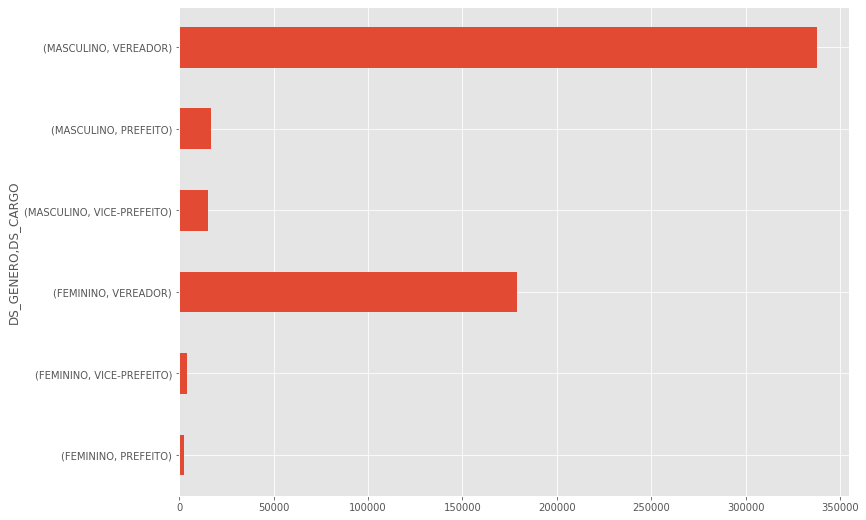

In [ ]:
df.groupby(by='DS_GENERO')['DS_CARGO'].value_counts(ascending=True).plot(kind='barh')

In [ ]:
df.query('DS_CARGO=="PREFEITO" & DS_GENERO=="MASCULINO"').value_counts()

CODIGO_TSE  NM_UE           DS_CARGO  SQ_CANDIDATO  NM_CANDIDATO                             NM_URNA_CANDIDATO  NM_SOCIAL_CANDIDATO  TP_AGREMIACAO    SG_PARTIDO    NM_PARTIDO                                DS_COMPOSICAO_COLIGACAO                DS_NACIONALIDADE  SG_UF_NASCIMENTO  DT_NASCIMENTO  NR_IDADE_DATA_POSSE  DS_GENERO  DS_GRAU_INSTRUCAO        DS_ESTADO_CIVIL  DS_COR_RACA  DS_OCUPACAO                                               VR_DESPESA_MAX_CAMPANHA  ST_REELEICAO  ST_DECLARAR_BENS
99074       INDIAVAÍ        PREFEITO  110001240832  GUILHERME EDUARDO MODESTO                GUILHERME MODESTO  #NULO#               PARTIDO ISOLADO  REPUBLICANOS  REPUBLICANOS                              REPUBLICANOS                           BRASILEIRA NATA   MT                1984-01-10     36                   MASCULINO  ENSINO MÉDIO INCOMPLETO  CASADO(A)        BRANCA       EMPRESÁRIO                                                123077                   N             S                   1
3

In [ ]:
df.query('DS_CARGO=="PREFEITO" & DS_GENERO=="FEMININO"').value_counts()

CODIGO_TSE  NM_UE                   DS_CARGO  SQ_CANDIDATO  NM_CANDIDATO                      NM_URNA_CANDIDATO     NM_SOCIAL_CANDIDATO  TP_AGREMIACAO    SG_PARTIDO    NM_PARTIDO                               DS_COMPOSICAO_COLIGACAO                                            DS_NACIONALIDADE  SG_UF_NASCIMENTO  DT_NASCIMENTO  NR_IDADE_DATA_POSSE  DS_GENERO  DS_GRAU_INSTRUCAO      DS_ESTADO_CIVIL            DS_COR_RACA  DS_OCUPACAO              VR_DESPESA_MAX_CAMPANHA  ST_REELEICAO  ST_DECLARAR_BENS
99015       COMODORO                PREFEITO  110001207577  GUIOMAR CARDOSO PIOVEZAN          GUIOMAR CARDOSO       #NULO#               COLIGAÇÃO        PDT           PARTIDO DEMOCRÁTICO TRABALHISTA          PDT / CIDADANIA / PSL / PROS                                       BRASILEIRA NATA   MS                1970-03-03     50                   FEMININO   SUPERIOR COMPLETO      CASADO(A)                  PARDA        VEREADOR                 123077                   N             S          

In [ ]:
df['SG_PARTIDO'].value_counts()

MDB              44946
PSD              39586
PP               38369
DEM              33105
PSDB             33079
PT               31653
REPUBLICANOS     28731
PDT              28609
PL               28362
PSB              26850
PTB              23717
PSL              22090
PODE             20617
PSC              18033
CIDADANIA        17484
SOLIDARIEDADE    17075
AVANTE           15211
PATRIOTA         14348
PV               12228
PROS             11829
PC do B          10675
PRTB              7961
PTC               6840
PMN               5049
DC                4855
REDE              4831
PSOL              4730
PMB               2870
NOVO               620
PSTU               205
PCO                143
UP                 133
PCB                 75
Name: SG_PARTIDO, dtype: int64

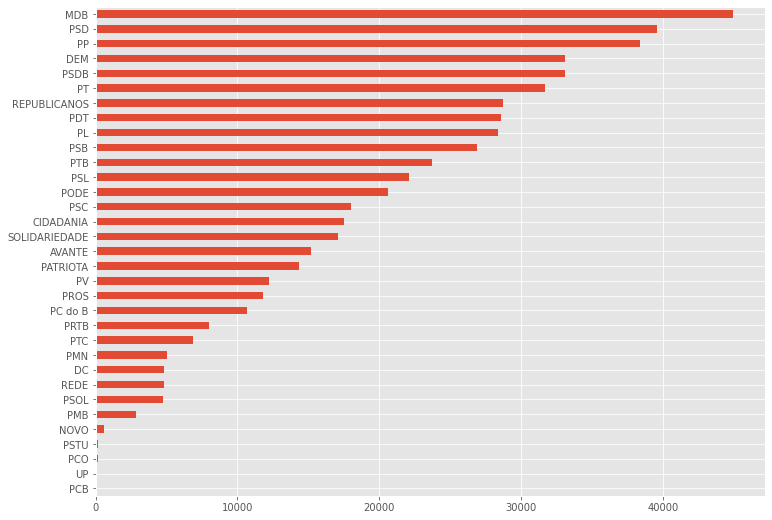

In [ ]:
df['SG_PARTIDO'].value_counts(ascending=True).plot(kind='barh')

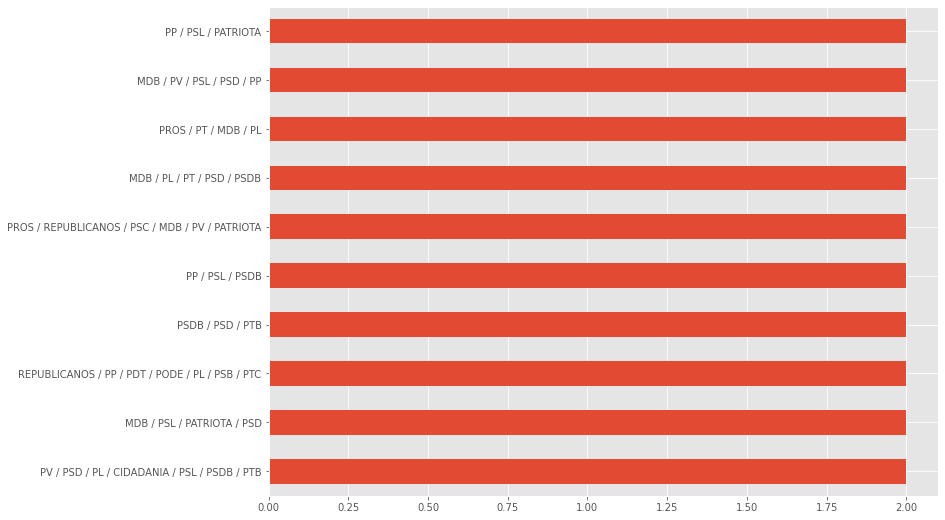

In [ ]:
df['DS_COMPOSICAO_COLIGACAO'].value_counts().tail(10).plot(kind='barh')

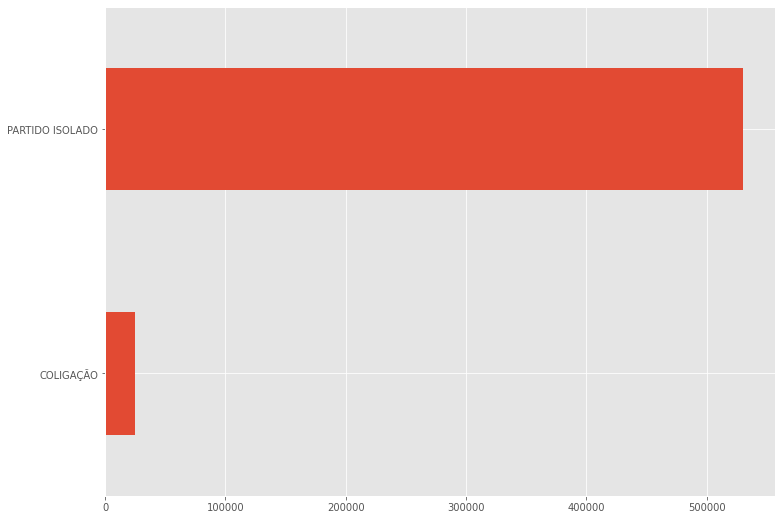

In [ ]:
df['TP_AGREMIACAO'].value_counts(ascending=True).plot(kind='barh')

In [ ]:
df['VR_DESPESA_MAX_CAMPANHA'].max()

51799384

In [ ]:
df[df['VR_DESPESA_MAX_CAMPANHA'] == 51799384]

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
33705,71072,SÃO PAULO,PREFEITO,250000746936,GUILHERME CASTRO BOULOS,GUILHERME BOULOS,#NULO#,COLIGAÇÃO,PSOL,PARTIDO SOCIALISMO E LIBERDADE,PCB / PSOL / UP,BRASILEIRA NATA,SP,1982-06-19,38,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,PROFESSOR DE ENSINO SUPERIOR,51799384,N,S
62682,71072,SÃO PAULO,PREFEITO,250000693062,FILIPE TOMAZELLI SABARA,SABARÁ,#NULO#,PARTIDO ISOLADO,NOVO,PARTIDO NOVO,NOVO,BRASILEIRA NATA,SP,1983-08-16,37,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,EMPRESÁRIO,51799384,N,S
78873,71072,SÃO PAULO,PREFEITO,250001094597,CELSO UBIRAJARA RUSSOMANNO,CELSO RUSSOMANNO,#NULO#,COLIGAÇÃO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS / PTB,BRASILEIRA NATA,SP,1956-08-20,64,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,JORNALISTA E REDATOR,51799384,N,S
107960,71072,SÃO PAULO,PREFEITO,250000896546,BRUNO COVAS LOPES,BRUNO COVAS,#NULO#,COLIGAÇÃO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PP / MDB / PODE / PSC / PL / CIDADANIA / DEM /...,BRASILEIRA NATA,SP,1980-07-04,40,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,PREFEITO,51799384,N,S
216762,71072,SÃO PAULO,PREFEITO,250000658458,JOICE CRISTINA HASSELMANN,JOICE HASSELMANN,#NULO#,COLIGAÇÃO,PSL,PARTIDO SOCIAL LIBERAL,DC / PSL,BRASILEIRA NATA,PR,1978-01-29,42,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,JORNALISTA E REDATOR,51799384,N,S
217154,71072,SÃO PAULO,PREFEITO,250000661535,ANGELO ANDREA MATARAZZO,ANDREA MATARAZZO,#NULO#,PARTIDO ISOLADO,PSD,PARTIDO SOCIAL DEMOCRÁTICO,PSD,BRASILEIRA NATA,SP,1956-11-22,64,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,ADMINISTRADOR,51799384,N,S
224596,71072,SÃO PAULO,PREFEITO,250001172314,ANTÔNIO CARLOS SILVA,ANTÔNIO CARLOS,#NULO#,PARTIDO ISOLADO,PCO,PARTIDO DA CAUSA OPERÁRIA,PCO,BRASILEIRA NATA,RJ,1962-11-11,58,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PRETA,PROFESSOR DE ENSINO MÉDIO,51799384,N,S
287824,71072,SÃO PAULO,PREFEITO,250000641390,ARTHUR MOLEDO DO VAL,ARTHUR DO VAL MAMÃE FALEI,#NULO#,PARTIDO ISOLADO,PATRIOTA,PATRIOTA,PATRIOTA,BRASILEIRA NATA,SP,1986-08-21,34,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,DEPUTADO,51799384,N,S
294667,71072,SÃO PAULO,PREFEITO,250001152470,MARINA MEDEIROS HELOU,MARINA HELOU,#NULO#,PARTIDO ISOLADO,REDE,REDE SUSTENTABILIDADE,REDE,BRASILEIRA NATA,SP,1987-08-25,33,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,DEPUTADO,51799384,N,S
317957,71072,SÃO PAULO,PREFEITO,250001012981,MÁRCIO LUIZ FRANÇA GOMES,MÁRCIO FRANÇA,#NULO#,COLIGAÇÃO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PDT / PMN / PSB / AVANTE / SOLIDARIEDADE,BRASILEIRA NATA,SP,1963-06-23,57,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,OUTROS,51799384,N,S


In [ ]:
# Não declarado = -1
df[df['VR_DESPESA_MAX_CAMPANHA'] == -1]

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
26,10073,ALTOS,VICE-PREFEITO,180000650063,EDIVALDO DE SOUSA MARTINS,PROF EDIVALDO MARTINS,#NULO#,PARTIDO ISOLADO,PV,PARTIDO VERDE,PV,BRASILEIRA NATA,PI,1974-08-25,46,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,SERVIDOR PÚBLICO ESTADUAL,-1,N,S
93,87734,OSÓRIO,VICE-PREFEITO,210000652886,ROSEMERI FERREIRA WEBER,ROSEMERI WEBER,#NULO#,PARTIDO ISOLADO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PSB,BRASILEIRA NATA,RS,1989-10-26,31,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,PROFESSOR DE ENSINO FUNDAMENTAL,-1,N,S
115,72036,TUPI PAULISTA,VICE-PREFEITO,250001073496,NEDÉCIO DE LAZARI,NEDÉCIO DENTISTA,#NULO#,COLIGAÇÃO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,DEM / PSDB / MDB / PT,BRASILEIRA NATA,SP,1957-10-17,63,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,ODONTÓLOGO,-1,S,S
116,80543,PLANALTO ALEGRE,VICE-PREFEITO,240001073460,REINALDO LUIZ HANS,REINALDO HANS,#NULO#,COLIGAÇÃO,PSL,PARTIDO SOCIAL LIBERAL,PSD / PSL,BRASILEIRA NATA,SC,1952-03-06,68,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,-1,N,S
163,81477,INDAIAL,VICE-PREFEITO,240000633095,ZELIR NEZI,ZELIR TIROL,#NULO#,COLIGAÇÃO,PSD,PARTIDO SOCIAL DEMOCRÁTICO,PSDB / PSD / PODE / REPUBLICANOS,BRASILEIRA NATA,SC,1953-07-02,67,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,DIVORCIADO(A),BRANCA,APOSENTADO (EXCETO SERVIDOR PÚBLICO),-1,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554678,16713,EXTREMOZ,VICE-PREFEITO,200001084938,VERA LUCIA DA SILVA MOURA,PROFESSORA VERA LUCIA,#NULO#,PARTIDO ISOLADO,CIDADANIA,CIDADANIA,CIDADANIA,BRASILEIRA NATA,RN,1957-02-05,63,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,-1,N,S
554749,37818,PAULO AFONSO,VICE-PREFEITO,50000766776,MARCONDES FRANCISCO DOS SANTOS,MARCONDES FRANCISCO,#NULO#,COLIGAÇÃO,PSD,PARTIDO SOCIAL DEMOCRÁTICO,PSC / DEM / PSD / REPUBLICANOS / PC do B / PDT...,BRASILEIRA NATA,BA,1965-12-14,55,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,VEREADOR,-1,N,S
554793,95990,SÃO LUÍS DE MONTES BELOS,VICE-PREFEITO,90001033264,JORCELINO MARQUES PALMEIRA JUNIOR,JÚNIOR,#NULO#,COLIGAÇÃO,DEM,DEMOCRATAS,DEM / REPUBLICANOS / PDT / PSB,BRASILEIRA NATA,GO,1967-03-15,53,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),PARDA,VEREADOR,-1,N,S
554843,43770,CORDISBURGO,VICE-PREFEITO,130001257448,ALDAIR MARQUES MARTINS,ALDAIR CRISTALEIRO,#NULO#,COLIGAÇÃO,PROS,PARTIDO REPUBLICANO DA ORDEM SOCIAL,PT / DEM / PROS,BRASILEIRA NATA,MG,1975-07-27,45,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,VEREADOR,-1,N,S


In [ ]:
df['VR_DESPESA_MAX_CAMPANHA'].mean()

98456.9142472009

In [ ]:
df[df['VR_DESPESA_MAX_CAMPANHA'] == 123077]

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
21,91847,PARANHOS,PREFEITO,120000769026,HELIOMAR KLABUNDE,HELIOMAR KLABUNDE,#NULO#,COLIGAÇÃO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,PTB / PT / MDB / PSB,BRASILEIRA NATA,SC,1960-11-05,60,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,123077,N,S
161,3123,PACARAIMA,PREFEITO,230000975698,JULIANO TORQUATO DOS SANTOS,JULIANO TORQUATO,#NULO#,COLIGAÇÃO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS / CIDADANIA / PV / PSDB / SOLIDAR...,BRASILEIRA NATA,GO,1981-01-30,39,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),PARDA,PREFEITO,123077,N,S
172,2097,BARCELOS,PREFEITO,40000967811,CLEBER OLIVEIRA DA SILVA,CLEBAO,#NULO#,PARTIDO ISOLADO,SOLIDARIEDADE,SOLIDARIEDADE,SOLIDARIEDADE,BRASILEIRA NATA,AM,1980-03-06,40,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,COMERCIANTE,123077,N,S
193,40657,ARACITABA,PREFEITO,130000743989,EDUARDO OLIVEIRA MELQUIADES,DUDU DO BAR,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,MG,1979-10-15,41,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),SEM INFORMAÇÃO,COMERCIANTE,123077,N,S
224,13200,ERERÉ,PREFEITO,60000939831,FRANCISCO OTONI DE QUEIROZ MOURA,OTONI QUEIROZ,#NULO#,PARTIDO ISOLADO,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,PDT,BRASILEIRA NATA,RN,1978-02-12,42,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SERVIDOR PÚBLICO ESTADUAL,123077,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554836,93530,FAZENDA NOVA,PREFEITO,90000884992,MARCUS VINICIUS AZEREDO COSTA,MARCUS,#NULO#,COLIGAÇÃO,CIDADANIA,CIDADANIA,PSL / CIDADANIA / PP,BRASILEIRA NATA,GO,1984-12-20,36,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,ADVOGADO,123077,N,S
554873,19526,POÇO DE JOSÉ DE MOURA,PREFEITO,150000733073,PAULO BRAZ DE MOURA,PAULO BRAZ,#NULO#,COLIGAÇÃO,CIDADANIA,CIDADANIA,PTB / CIDADANIA,BRASILEIRA NATA,PB,1959-01-25,61,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,TÉCNICO EM AGRONOMIA E AGRIMENSURA,123077,N,S
554879,10413,CAMPINAS DO PIAUÍ,PREFEITO,180000758693,ARLINDO BISPO DA SILVA,ARLINDO BISPO,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,PI,1964-07-03,56,MASCULINO,SUPERIOR INCOMPLETO,DIVORCIADO(A),PARDA,SERVIDOR PÚBLICO FEDERAL,123077,N,S
554886,83216,SÃO JOÃO BATISTA,PREFEITO,240000985993,HERIBERTO EURIDES DE SOUZA,BETINHO SOUZA,#NULO#,COLIGAÇÃO,CIDADANIA,CIDADANIA,CIDADANIA / PP,BRASILEIRA NATA,SC,1971-04-26,49,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,123077,N,S


In [ ]:
df['ST_DECLARAR_BENS'].value_counts()

S    493596
N     61313
Name: ST_DECLARAR_BENS, dtype: int64

In [ ]:
df[['DS_GENERO', 'VR_DESPESA_MAX_CAMPANHA']].groupby('DS_GENERO').mean().sort_values('VR_DESPESA_MAX_CAMPANHA', ascending=False)

,VR_DESPESA_MAX_CAMPANHA
DS_GENERO,
MASCULINO,103104.192452
FEMININO,89197.793643


In [ ]:
df[(df['VR_DESPESA_MAX_CAMPANHA'] > 123077) & (df['VR_DESPESA_MAX_CAMPANHA'] <= 51799384)]

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
7,58335,DUQUE DE CAXIAS,VEREADOR,190000772380,MARCOS TEIXEIRA DA SILVA,MARCOS TEIXEIRA,#NULO#,PARTIDO ISOLADO,PSL,PARTIDO SOCIAL LIBERAL,PSL,BRASILEIRA NATA,RJ,1963-10-11,57,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,348732,N,S
10,71455,SOROCABA,VEREADOR,250000940066,RENATA CRISTINA CHAGAS ALVES DA SILVA,RENATA CHAGAS,#NULO#,PARTIDO ISOLADO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,BRASILEIRA NATA,SP,1971-08-24,49,FEMININO,SUPERIOR COMPLETO,CASADO(A),PARDA,ENFERMEIRO,158736,N,S
13,25313,RECIFE,VEREADOR,170000930890,JANAÍNA ALVES DA SILVA,JANAÍNA NANAI,#NULO#,PARTIDO ISOLADO,PC do B,PARTIDO COMUNISTA DO BRASIL,PC do B,BRASILEIRA NATA,PE,1983-07-03,37,FEMININO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,OUTROS,1011150,N,N
14,71455,SOROCABA,VEREADOR,250000937272,MELQUISEDEQUE GARCIA ROCHA,MELQUI,#NULO#,PARTIDO ISOLADO,PV,PARTIDO VERDE,PV,BRASILEIRA NATA,SP,1979-06-06,41,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,COMERCIANTE,158736,N,S
15,5835,PARAUAPEBAS,VEREADOR,140001234659,ISRAEL DA SILVA SOUSA,ISRAEL SILVA,#NULO#,PARTIDO ISOLADO,PMB,PARTIDO DA MULHER BRASILEIRA,PMB,BRASILEIRA NATA,PA,1988-09-12,32,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,CABELEIREIRO E BARBEIRO,211925,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554895,4839,MARABÁ,VEREADOR,140000761898,BRUNO MARTINS DOS SANTOS,BRUNO MARTINS,#NULO#,PARTIDO ISOLADO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,BRASILEIRA NATA,PA,1989-01-28,31,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PARDA,COMERCIANTE,238660,N,S
554899,18473,SÃO MIGUEL,PREFEITO,200000769724,CÉLIO GONÇALVES DE QUEIRÓZ,CÉLIO DE ELIZEU,#NULO#,COLIGAÇÃO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB / PP,BRASILEIRA NATA,RN,1969-11-27,51,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,SEPARADO(A) JUDICIALMENTE,BRANCA,AGRICULTOR,296448,N,S
554900,69795,RIO CLARO,VEREADOR,250000858258,BRUNO HENRIQUE SOUZA DE OLIVEIRA,BRUNO H S OLIVEIRA,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,SP,1993-06-10,27,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,ADVOGADO,149495,N,N
554902,60011,RIO DE JANEIRO,VEREADOR,190000885326,MARCELO MAYWALD,MARCELO MAYWALD,#NULO#,PARTIDO ISOLADO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS,BRASILEIRA NATA,RJ,1976-11-03,44,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,OUTROS,1594577,N,N


In [ ]:
df.groupby('SG_PARTIDO')['VR_DESPESA_MAX_CAMPANHA'].sum().sort_values(ascending=False)

SG_PARTIDO
MDB              2808475774
PT               2714496643
PSD              2648112354
REPUBLICANOS     2585209638
PSDB             2506098082
PSL              2491027024
DEM              2379804993
PDT              2377137310
PP               2254287322
PSB              2175792515
PL               2153593927
PODE             2147057266
PTB              2018026040
SOLIDARIEDADE    1969876957
PSC              1890655569
PATRIOTA         1849969792
AVANTE           1846150407
CIDADANIA        1697273016
PC do B          1661355983
PRTB             1595503482
PV               1556382176
PROS             1488105077
PTC              1366643005
PSOL             1322712818
DC               1053377080
PMN              1017166486
REDE              950809252
PMB               819947954
NOVO              569302113
PSTU              290508051
PCO               284905979
UP                103161552
PCB                41702191
Name: VR_DESPESA_MAX_CAMPANHA, dtype: int64

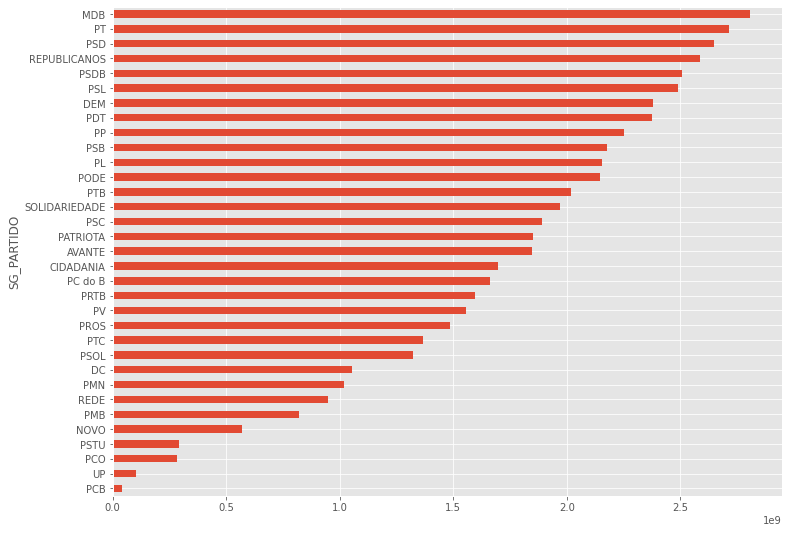

In [ ]:
df.groupby('SG_PARTIDO')['VR_DESPESA_MAX_CAMPANHA'].sum().sort_values(ascending=True).plot(kind='barh')

In [ ]:
df[df['VR_DESPESA_MAX_CAMPANHA'] == df['VR_DESPESA_MAX_CAMPANHA'].max()][['DS_GENERO', 'DS_COR_RACA', 'NM_CANDIDATO', 'DS_OCUPACAO']]

,DS_GENERO,DS_COR_RACA,NM_CANDIDATO,DS_OCUPACAO
33705,MASCULINO,BRANCA,GUILHERME CASTRO BOULOS,PROFESSOR DE ENSINO SUPERIOR
62682,MASCULINO,BRANCA,FILIPE TOMAZELLI SABARA,EMPRESÁRIO
78873,MASCULINO,BRANCA,CELSO UBIRAJARA RUSSOMANNO,JORNALISTA E REDATOR
107960,MASCULINO,BRANCA,BRUNO COVAS LOPES,PREFEITO
216762,FEMININO,BRANCA,JOICE CRISTINA HASSELMANN,JORNALISTA E REDATOR
217154,MASCULINO,BRANCA,ANGELO ANDREA MATARAZZO,ADMINISTRADOR
224596,MASCULINO,PRETA,ANTÔNIO CARLOS SILVA,PROFESSOR DE ENSINO MÉDIO
287824,MASCULINO,BRANCA,ARTHUR MOLEDO DO VAL,DEPUTADO
294667,FEMININO,BRANCA,MARINA MEDEIROS HELOU,DEPUTADO
317957,MASCULINO,BRANCA,MÁRCIO LUIZ FRANÇA GOMES,OUTROS


In [ ]:
df[df['ST_REELEICAO'] == 'S']

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
6,76473,JATAIZINHO,VEREADOR,160001252163,LAERCIO FERNANDES QUITÉRIO,LAERCIO QUITÉRIO,#NULO#,PARTIDO ISOLADO,PROS,PARTIDO REPUBLICANO DA ORDEM SOCIAL,PROS,BRASILEIRA NATA,PR,1965-03-27,55,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,DIVORCIADO(A),BRANCA,VIGILANTE,12308,S,S
15,5835,PARAUAPEBAS,VEREADOR,140001234659,ISRAEL DA SILVA SOUSA,ISRAEL SILVA,#NULO#,PARTIDO ISOLADO,PMB,PARTIDO DA MULHER BRASILEIRA,PMB,BRASILEIRA NATA,PA,1988-09-12,32,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,CABELEIREIRO E BARBEIRO,211925,S,S
20,28371,PILAR,VEREADOR,20001230944,BENEDITO CAVALCANTE DE BARROS NETO,BIU BARROS,#NULO#,PARTIDO ISOLADO,AVANTE,AVANTE,AVANTE,BRASILEIRA NATA,AL,1983-12-08,37,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,73203,S,S
106,493,ITAPUÃ DO OESTE,VEREADOR,220001062530,IVAN CARLOS TENÓRIO OLIVEIRA,IVAN TENORIO,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,MT,1977-06-23,43,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),PARDA,VEREADOR,12308,S,S
115,72036,TUPI PAULISTA,VICE-PREFEITO,250001073496,NEDÉCIO DE LAZARI,NEDÉCIO DENTISTA,#NULO#,COLIGAÇÃO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,DEM / PSDB / MDB / PT,BRASILEIRA NATA,SP,1957-10-17,63,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,ODONTÓLOGO,-1,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554829,41947,CÓRREGO FUNDO,VEREADOR,130001241923,ROMARIO LUIZ DA COSTA,ZULÃO,#NULO#,PARTIDO ISOLADO,PL,PARTIDO LIBERAL,PL,BRASILEIRA NATA,MG,1990-05-22,30,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,MOTORISTA DE VEÍCULOS DE TRANSPORTE DE CARGA,12308,S,S
554857,76074,IRATI,VEREADOR,160001132648,RONILDO ANTONIO PAMPUCH SUREK,RONI SUREK,#NULO#,PARTIDO ISOLADO,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,PDT,BRASILEIRA NATA,PR,1965-10-22,55,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,VEREADOR,55296,S,S
554869,4030,ACARÁ,VEREADOR,140001235036,IZAIAS GOMES MATIAS,IZAIAS DA COLATINA,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,PA,1975-01-31,45,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PARDA,AGRICULTOR,22326,S,S
554877,71552,TABATINGA,VEREADOR,250001010002,PEDRO ROGERIO PAVANI,PEDRO PAVANI,#NULO#,PARTIDO ISOLADO,DEM,DEMOCRATAS,DEM,BRASILEIRA NATA,SP,1973-06-29,47,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,12308,S,N


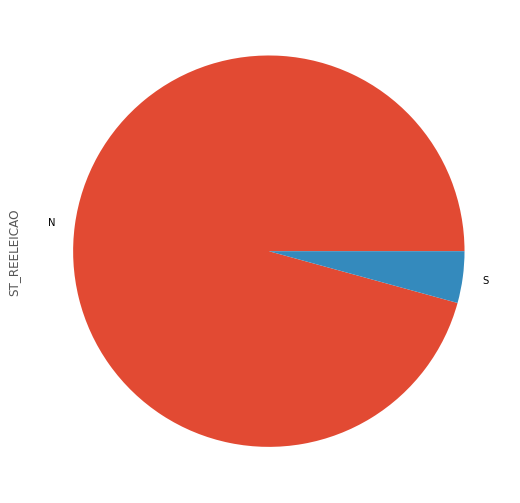

In [ ]:
df['ST_REELEICAO'].value_counts().plot(kind='pie')

Com as novas regras eleitorais para a eleição de vereador não é possível fazer coligações proporcionais, só candidatos isolados para impedir que a soma dos votos seja dividida entre diferentes partidos. O voto é em lista e assim fica restrita aos candidatos da legenda. Será que algum partido não está cumprindo a Emenda Constitucional 97 (EC97)?

In [ ]:
df[(df['DS_CARGO'] == 'VEREADOR') & (df['TP_AGREMIACAO'] != 'COLIGAÇÃO')]

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
0,57150,PEDRO CANÁRIO,VEREADOR,80001107438,RIMARCK SILVA TEIXEIRA,RIMARCK TEIXEIRA,#NULO#,PARTIDO ISOLADO,PV,PARTIDO VERDE,PV,BRASILEIRA NATA,ES,1990-05-03,30,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PRETA,EMPRESÁRIO,34922,N,N
1,90247,SÃO JOSÉ DO XINGU,VEREADOR,110000678054,MARCOS ROGERIO PEREIRA NUNES,BUGÃO,#NULO#,PARTIDO ISOLADO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PSB,BRASILEIRA NATA,MT,1986-12-18,34,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,OUTROS,12308,N,S
2,80861,IRATI,VEREADOR,240000678029,ZENILDE TEDESCO,ZENILDE TEDESCO,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,SC,1960-04-06,60,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,OUTROS,12308,N,S
3,91650,TRÊS LAGOAS,VEREADOR,120001006680,TONIEL CARLOS FERNANDES DOS SANTOS,TONIEL FERNANDES,#NULO#,PARTIDO ISOLADO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB,BRASILEIRA NATA,MS,1979-10-12,41,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,97866,N,S
4,68977,POÁ,VEREADOR,250000995183,WELLINGTON DE PAULA MARTINS GUIMARAES,LETINHO GUIMARÃES,#NULO#,PARTIDO ISOLADO,DEM,DEMOCRATAS,DEM,BRASILEIRA NATA,SP,1985-05-17,35,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),BRANCA,VENDEDOR DE COMÉRCIO VAREJISTA E ATACADISTA,42165,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554902,60011,RIO DE JANEIRO,VEREADOR,190000885326,MARCELO MAYWALD,MARCELO MAYWALD,#NULO#,PARTIDO ISOLADO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS,BRASILEIRA NATA,RJ,1976-11-03,44,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,OUTROS,1594577,N,N
554903,18872,UMARIZAL,VEREADOR,200000772655,PEDRO UBIRATAN DE PAIVA SOUZA,UBIRATAN,#NULO#,PARTIDO ISOLADO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PSB,BRASILEIRA NATA,RN,1969-06-28,51,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,AGENTE DE SAÚDE E SANITARISTA,21313,N,S
554904,58971,SÃO GONÇALO,VEREADOR,190000858090,MAYCK DOUGLAS PEREIRA DA SILVA,DOUGLAS DA SAÚDE,#NULO#,PARTIDO ISOLADO,SOLIDARIEDADE,SOLIDARIEDADE,SOLIDARIEDADE,BRASILEIRA NATA,RJ,1975-05-16,45,MASCULINO,ENSINO MÉDIO COMPLETO,DIVORCIADO(A),PARDA,COMERCIANTE,294899,N,S
554905,4596,FARO,VEREADOR,140000768093,ROSETE ROCHA DUQUE,ROSETE DUQUE,#NULO#,PARTIDO ISOLADO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,MDB,BRASILEIRA NATA,PA,1979-10-31,41,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,12308,N,S


Para prefeito as coligações são permitidas.

In [ ]:
df[(df['DS_CARGO'] == 'PREFEITO') & (df['TP_AGREMIACAO'] != 'PARTIDO ISOLADO')]

,CODIGO_TSE,NM_UE,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,ST_REELEICAO,ST_DECLARAR_BENS
21,91847,PARANHOS,PREFEITO,120000769026,HELIOMAR KLABUNDE,HELIOMAR KLABUNDE,#NULO#,COLIGAÇÃO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,PTB / PT / MDB / PSB,BRASILEIRA NATA,SC,1960-11-05,60,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,123077,N,S
161,3123,PACARAIMA,PREFEITO,230000975698,JULIANO TORQUATO DOS SANTOS,JULIANO TORQUATO,#NULO#,COLIGAÇÃO,REPUBLICANOS,REPUBLICANOS,REPUBLICANOS / CIDADANIA / PV / PSDB / SOLIDAR...,BRASILEIRA NATA,GO,1981-01-30,39,MASCULINO,SUPERIOR INCOMPLETO,CASADO(A),PARDA,PREFEITO,123077,N,S
251,18279,SANTANA DO MATOS,PREFEITO,200001035328,CIPRIANO CORREIA,CIPRIANO CORREIA,#NULO#,COLIGAÇÃO,PL,PARTIDO LIBERAL,MDB / PL,BRASILEIRA NATA,RN,1945-10-10,75,MASCULINO,SUPERIOR COMPLETO,VIÚVO(A),BRANCA,EMPRESÁRIO,177142,N,S
311,73369,JAÚ DO TOCANTINS,PREFEITO,270000838100,MARIA MENDES DOS SANTOS,MARIA MENDES,#NULO#,COLIGAÇÃO,PSC,PARTIDO SOCIAL CRISTÃO,PSC / MDB,BRASILEIRA NATA,GO,1982-08-05,38,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,ADVOGADO,123077,N,S
372,39578,VALENÇA,PREFEITO,50000692497,JUCÉLIA SOUSA DO NASCIMENTO,JUCÉLIA NASCIMENTO,#NULO#,COLIGAÇÃO,PL,PARTIDO LIBERAL,PODE / PL / DEM / PSB / PATRIOTA / PC do B / PROS,BRASILEIRA NATA,BA,1975-12-07,45,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,ASSISTENTE SOCIAL,413544,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554848,37036,MAIRI,PREFEITO,50001169941,JOSÉ BONIFÁCIO PEREIRA DA SILVA,JOBOPE,#NULO#,COLIGAÇÃO,PT,PARTIDO DOS TRABALHADORES,MDB / PT / PP / PC do B,BRASILEIRA NATA,BA,1963-05-26,57,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,EMPRESÁRIO,192799,N,S
554873,19526,POÇO DE JOSÉ DE MOURA,PREFEITO,150000733073,PAULO BRAZ DE MOURA,PAULO BRAZ,#NULO#,COLIGAÇÃO,CIDADANIA,CIDADANIA,PTB / CIDADANIA,BRASILEIRA NATA,PB,1959-01-25,61,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,TÉCNICO EM AGRONOMIA E AGRIMENSURA,123077,N,S
554886,83216,SÃO JOÃO BATISTA,PREFEITO,240000985993,HERIBERTO EURIDES DE SOUZA,BETINHO SOUZA,#NULO#,COLIGAÇÃO,CIDADANIA,CIDADANIA,CIDADANIA / PP,BRASILEIRA NATA,SC,1971-04-26,49,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,123077,N,S
554899,18473,SÃO MIGUEL,PREFEITO,200000769724,CÉLIO GONÇALVES DE QUEIRÓZ,CÉLIO DE ELIZEU,#NULO#,COLIGAÇÃO,PSDB,PARTIDO DA SOCIAL DEMOCRACIA BRASILEIRA,PSDB / PP,BRASILEIRA NATA,RN,1969-11-27,51,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,SEPARADO(A) JUDICIALMENTE,BRANCA,AGRICULTOR,296448,N,S


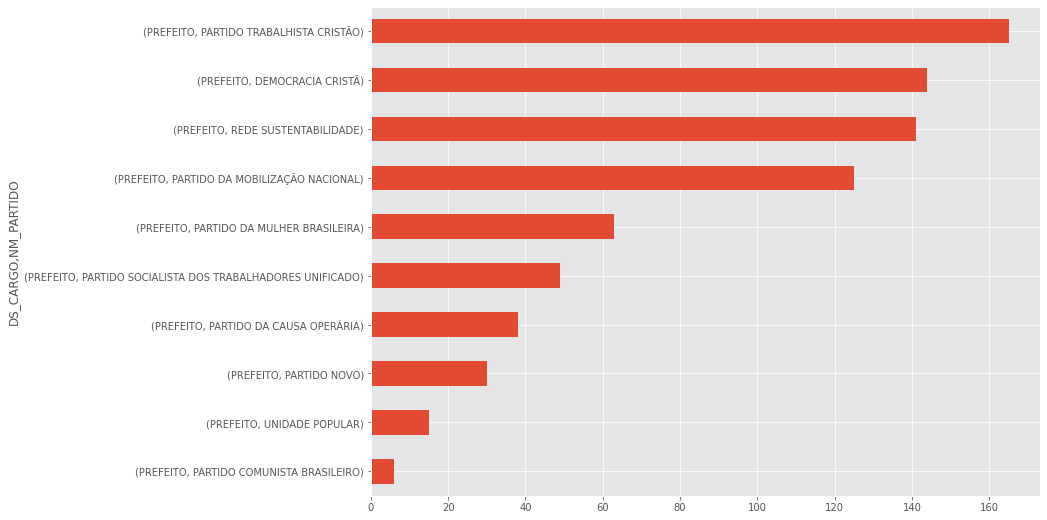

In [ ]:
df.groupby('DS_CARGO')['NM_PARTIDO'].value_counts(ascending=True).head(10).plot(kind='barh')

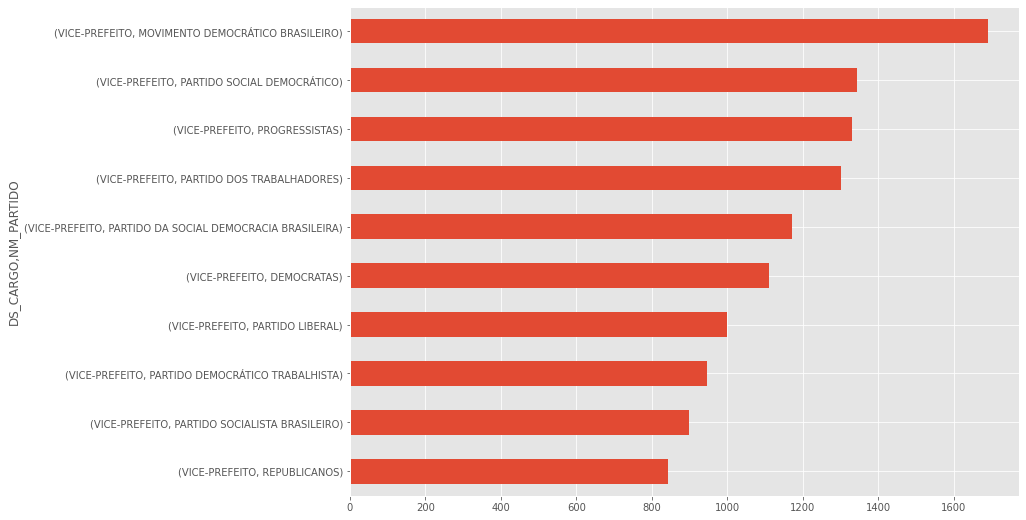

In [ ]:
df.groupby('DS_CARGO')['NM_PARTIDO'].value_counts(ascending=True).tail(10).plot(kind='barh')

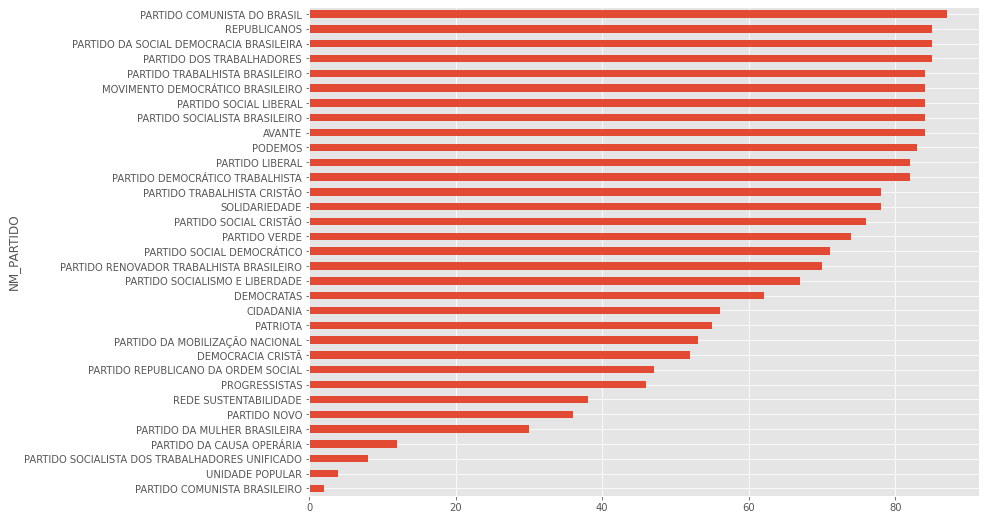

In [ ]:
df.query('NM_UE == "SÃO PAULO"').groupby('NM_PARTIDO').size().sort_values(ascending=True).plot(kind='barh')

Baixando o arquivo bem_candidato do TSE para unir os dois dataframes

In [ ]:
bens_cand = pd.read_csv('/content/drive/My Drive/eleicoes2020_dados_tse/eleições2020/bem_candidato_2020/bem_candidato_2020_BRASIL.csv', 
                        encoding='latin-1', index_col=None, low_memory=False, error_bad_lines=False, decimal=',',
                        sep=';', quotechar='"', usecols=['SG_UF', 'SG_UE','NM_UE','SQ_CANDIDATO',
                                                         'DS_BEM_CANDIDATO','VR_BEM_CANDIDATO'])

In [ ]:
bens_cand.head()

,SG_UF,SG_UE,NM_UE,SQ_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
0,GO,96059,SÃO SIMÃO,90000791563,UM LOTE DE TERRENO LOCALIZADO AV MINAS GERAIS ...,5000.0
1,PR,74446,ITAPERUÇU,160000996056,LOCALIZADO NA RUA ANTONIO SIQUEIRA VIDAL,700000.0
2,CE,15873,AMONTADA,60000979523,BANCO DO BRASIL,3000.0
3,BA,35696,IGAPORÃ,50000792280,"2,5 HECTARES FAZENDA CAPÃO",30000.0
4,RS,85413,BENTO GONÇALVES,210000783855,TERRENO,550000.0


In [ ]:
bens_cand.columns = ['CODIGO_TSE' if x=='SG_UE' else x for x in bens_cand.columns] 

In [ ]:
bens_cand.SQ_CANDIDATO = bens_cand.SQ_CANDIDATO.astype('category')

In [ ]:
bens_cand.CODIGO_TSE = bens_cand.CODIGO_TSE.astype('category')

In [ ]:
bens_cand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007451 entries, 0 to 1007450
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   SG_UF             1007451 non-null  object  
 1   CODIGO_TSE        1007451 non-null  category
 2   NM_UE             1007451 non-null  object  
 3   SQ_CANDIDATO      1007451 non-null  category
 4   DS_BEM_CANDIDATO  1007451 non-null  object  
 5   VR_BEM_CANDIDATO  1007451 non-null  float64 
dtypes: category(2), float64(1), object(3)
memory usage: 49.3+ MB


In [ ]:
bens_cand.isnull().sum()

SG_UF               0
CODIGO_TSE          0
NM_UE               0
SQ_CANDIDATO        0
DS_BEM_CANDIDATO    0
VR_BEM_CANDIDATO    0
dtype: int64

In [ ]:
bens_cand['SQ_CANDIDATO'].nunique()

338803

In [ ]:
bens_cand.groupby('SQ_CANDIDATO')['VR_BEM_CANDIDATO'].sum().sort_values(ascending=False)

SQ_CANDIDATO
190001019131    4.913114e+09
160001000870    1.553326e+09
40000708943     1.400700e+09
120001076472    1.200002e+09
250000672259    1.100470e+09
                    ...     
140001119979    0.000000e+00
180000788476    0.000000e+00
140001119977    0.000000e+00
170001258077    0.000000e+00
180000763065    0.000000e+00
Name: VR_BEM_CANDIDATO, Length: 338803, dtype: float64

In [ ]:
candidatos = df.merge(bens_cand, on='SQ_CANDIDATO', how='left')
candidatos.head(3).T

,0,1,2
CODIGO_TSE_x,57150,90247,80861
NM_UE_x,PEDRO CANÁRIO,SÃO JOSÉ DO XINGU,IRATI
DS_CARGO,VEREADOR,VEREADOR,VEREADOR
SQ_CANDIDATO,80001107438,110000678054,240000678029
NM_CANDIDATO,RIMARCK SILVA TEIXEIRA,MARCOS ROGERIO PEREIRA NUNES,ZENILDE TEDESCO
NM_URNA_CANDIDATO,RIMARCK TEIXEIRA,BUGÃO,ZENILDE TEDESCO
NM_SOCIAL_CANDIDATO,#NULO#,#NULO#,#NULO#
TP_AGREMIACAO,PARTIDO ISOLADO,PARTIDO ISOLADO,PARTIDO ISOLADO
SG_PARTIDO,PV,PSB,MDB
NM_PARTIDO,PARTIDO VERDE,PARTIDO SOCIALISTA BRASILEIRO,MOVIMENTO DEMOCRÁTICO BRASILEIRO


In [ ]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223557 entries, 0 to 1223556
Data columns (total 28 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CODIGO_TSE_x             1223557 non-null  category      
 1   NM_UE_x                  1223557 non-null  object        
 2   DS_CARGO                 1223557 non-null  object        
 3   SQ_CANDIDATO             1223557 non-null  int64         
 4   NM_CANDIDATO             1223557 non-null  object        
 5   NM_URNA_CANDIDATO        1223553 non-null  object        
 6   NM_SOCIAL_CANDIDATO      1223557 non-null  object        
 7   TP_AGREMIACAO            1223557 non-null  object        
 8   SG_PARTIDO               1223557 non-null  object        
 9   NM_PARTIDO               1223557 non-null  object        
 10  DS_COMPOSICAO_COLIGACAO  1223557 non-null  object        
 11  DS_NACIONALIDADE         1223557 non-null  object        
 12  

In [ ]:
candidatos.drop(columns=['ST_REELEICAO','ST_DECLARAR_BENS', 'SG_UF', 'CODIGO_TSE_y', 'NM_UE_y'], axis=1, inplace=True)

In [ ]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1223557 entries, 0 to 1223556
Data columns (total 23 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   CODIGO_TSE_x             1223557 non-null  category      
 1   NM_UE_x                  1223557 non-null  object        
 2   DS_CARGO                 1223557 non-null  object        
 3   SQ_CANDIDATO             1223557 non-null  int64         
 4   NM_CANDIDATO             1223557 non-null  object        
 5   NM_URNA_CANDIDATO        1223553 non-null  object        
 6   NM_SOCIAL_CANDIDATO      1223557 non-null  object        
 7   TP_AGREMIACAO            1223557 non-null  object        
 8   SG_PARTIDO               1223557 non-null  object        
 9   NM_PARTIDO               1223557 non-null  object        
 10  DS_COMPOSICAO_COLIGACAO  1223557 non-null  object        
 11  DS_NACIONALIDADE         1223557 non-null  object        
 12  

In [ ]:
#João Carlos Ribeiro, o candidato mais rico do país
joao= bens_cand[bens_cand['SQ_CANDIDATO'] == 160001000870]

In [ ]:
joao

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
47943,PR,75523,PONTAL DO PARANÁ,160001000870,"Direitos sobre area de 390.967,50m2 em Pontal ...",6.500000e+05
49618,PR,75523,PONTAL DO PARANÁ,160001000870,4.000 açoes CEMIG,5.504000e+04
60026,PR,75523,PONTAL DO PARANÁ,160001000870,1.000 açoes SABESP,6.088000e+04
60974,PR,75523,PONTAL DO PARANÁ,160001000870,19.179.982 açoes JCR Administração e Participa...,3.059712e+08
61036,PR,75523,PONTAL DO PARANÁ,160001000870,Saldo conta corrente Caixa Economica Federal,1.080981e+04
102208,PR,75523,PONTAL DO PARANÁ,160001000870,Lote B-1 atribuido a proporcionalidade 30% des...,2.005063e+05
107172,PR,75523,PONTAL DO PARANÁ,160001000870,1.500 açoes Carrefour,3.507000e+04
109300,PR,75523,PONTAL DO PARANÁ,160001000870,Saldo conta corrente Credit Suisse,1.457180e+07
154400,PR,75523,PONTAL DO PARANÁ,160001000870,1.000 açoes Banrisul,2.166000e+04
191484,PR,75523,PONTAL DO PARANÁ,160001000870,"0,01% açoes empresa FR Energia",1.000000e+00


In [ ]:
joao['VR_BEM_CANDIDATO'].sum()

1553325556.2199998

In [ ]:
joao['VR_BEM_CANDIDATO'].max()

1115286085.65

In [ ]:
joao[joao['VR_BEM_CANDIDATO'] == 1115286085.65]

,SG_UF,CODIGO_TSE,NM_UE,SQ_CANDIDATO,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
330979,PR,75523,PONTAL DO PARANÁ,160001000870,Fundos de Investimento - BTG Pactual,1.115286e+09


In [ ]:
candidatos['VR_BEM_CANDIDATO'].max()

4910551240.0

In [ ]:
mario = candidatos[candidatos['VR_BEM_CANDIDATO']== 4910551240.0]

In [ ]:
mario

,CODIGO_TSE_x,NM_UE_x,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
133352,58017,ANGRA DOS REIS,PREFEITO,190001019131,MARIO DESCHAMPS,MARIO DESCHAMPS,#NULO#,PARTIDO ISOLADO,PV,PARTIDO VERDE,PV,BRASILEIRA NATA,SC,1954-04-26,66,MASCULINO,SUPERIOR INCOMPLETO,DIVORCIADO(A),BRANCA,INDUSTRIAL,1005566,PREDIO NA PRAIA DE BOTAFOGO - RIO DE JANEIRO - RJ,4.910551e+09


In [ ]:
candidatos[(candidatos['VR_BEM_CANDIDATO'] > 500000.00) & (bens_cand['VR_BEM_CANDIDATO'] < 1000000.00)]

,CODIGO_TSE_x,NM_UE_x,DS_CARGO,SQ_CANDIDATO,NM_CANDIDATO,NM_URNA_CANDIDATO,NM_SOCIAL_CANDIDATO,TP_AGREMIACAO,SG_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,DS_NACIONALIDADE,SG_UF_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,VR_DESPESA_MAX_CAMPANHA,DS_BEM_CANDIDATO,VR_BEM_CANDIDATO
51,91847,PARANHOS,PREFEITO,120000769026,HELIOMAR KLABUNDE,HELIOMAR KLABUNDE,#NULO#,COLIGAÇÃO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,PTB / PT / MDB / PSB,BRASILEIRA NATA,SC,1960-11-05,60,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,123077,Área Rural Fazenda Itapoa - ´Paranhos MS,601437.87
54,91847,PARANHOS,PREFEITO,120000769026,HELIOMAR KLABUNDE,HELIOMAR KLABUNDE,#NULO#,COLIGAÇÃO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,PTB / PT / MDB / PSB,BRASILEIRA NATA,SC,1960-11-05,60,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,123077,"Apartamento 101, Vila 03 - Em Florianópolis/SC",1000000.00
56,91847,PARANHOS,PREFEITO,120000769026,HELIOMAR KLABUNDE,HELIOMAR KLABUNDE,#NULO#,COLIGAÇÃO,MDB,MOVIMENTO DEMOCRÁTICO BRASILEIRO,PTB / PT / MDB / PSB,BRASILEIRA NATA,SC,1960-11-05,60,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,123077,Imóvel Rural- Fazenda São Jose em Sete Quedas/MS,6000000.00
98,90352,BARRA DO GARÇAS,VEREADOR,110000967033,DANIEL LIMA DA LUZ,DANIEL DO BAR,#NULO#,PARTIDO ISOLADO,PROS,PARTIDO REPUBLICANO DA ORDEM SOCIAL,PROS,BRASILEIRA NATA,MA,1974-10-01,46,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),PARDA,MOTORISTA PARTICULAR,95458,"UMA CASA LOCALIZADA NA AVENIDA AMAZONAS, N. 10...",700000.00
166,57053,VITÓRIA,VEREADOR,80001236030,WEVERTON FERREIRA PAES,WEVERTON PAES,#NULO#,PARTIDO ISOLADO,PSB,PARTIDO SOCIALISTA BRASILEIRO,PSB,BRASILEIRA NATA,MG,1956-11-26,64,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,COMERCIANTE,149748,Um terreno com 98 m2 com uma edificação mista ...,1000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006794,75353,CURITIBA,VEREADOR,160001194950,LOURDES FONSECA GAFFKE,LOURDES FONSECA DA SAÚDE,#NULO#,PARTIDO ISOLADO,DC,DEMOCRACIA CRISTÃ,DC,BRASILEIRA NATA,PR,1954-09-29,66,FEMININO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,ASSISTENTE SOCIAL,530526,RESIDENCIA,800000.00
1006907,94137,ITAPACI,VICE-PREFEITO,90000745652,EDNILSON FERREIRA DOS SANTOS,SOUZINHA DA VILA SANTANA,#NULO#,PARTIDO ISOLADO,PL,PARTIDO LIBERAL,PL,BRASILEIRA NATA,GO,1972-09-30,48,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,EMPRESÁRIO,-1,Saldo em VGBL/VRPG Banco Bradesco AS,902416.72
1007283,41998,CAETÉ,VEREADOR,130001178553,ELZA DA CONCEIÇÃO LIMA DE AQUINO,ELZA /TUCA DE BERENICE,#NULO#,PARTIDO ISOLADO,REDE,REDE SUSTENTABILIDADE,REDE,BRASILEIRA NATA,MG,1960-03-11,60,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),BRANCA,PROFESSOR DE ENSINO FUNDAMENTAL,65804,"1/4 IMOVEL DE 11067,60 M² LOCALIZADO NA TRAVES...",900000.00
1007394,71137,SÃO ROQUE,VEREADOR,250000644667,FERNANDA PERISSINOTTO,PROFESSORA FERNANDA,#NULO#,PARTIDO ISOLADO,PTB,PARTIDO TRABALHISTA BRASILEIRO,PTB,BRASILEIRA NATA,SP,1963-08-05,57,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,PROFESSOR DE ENSINO SUPERIOR,40350,Imóvel Matrícula 52895,700000.00
